In [133]:
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as py
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler

Reading the csv file to a variable

In [134]:
data=pd.read_csv('IRIS.csv')
data.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


The species is an important column so we cannot just drop it and hence we need to convert it to numeric values

In [135]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1

            df[column] = list(map(convert_to_int, df[column]))

    return df

In [136]:
data=handle_non_numerical_data(data)
data.head(150)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,2
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


All the non numeric values have been converted to numeric values...
setosa is 2
Versicolor is 1
Virginica is 0

We need all the features already given and hence are not dropping any of them

Viewing the count plot of the features 'species' and then using seaborn for visualisation

In [137]:
data['species'].value_counts()

species
2    50
1    50
0    50
Name: count, dtype: int64

Get a statistical knowledge regarding the dataset using the describe() function

In [138]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Visualization using violin plot

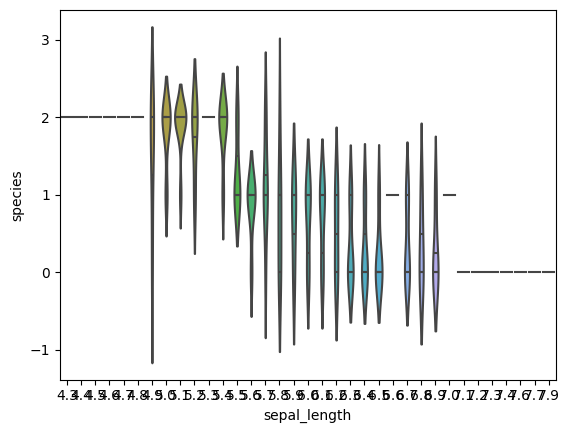

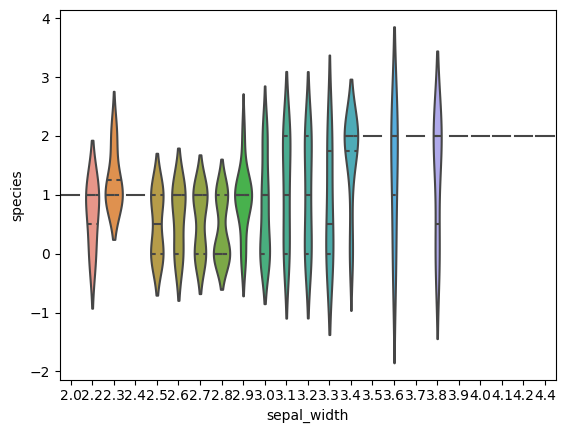

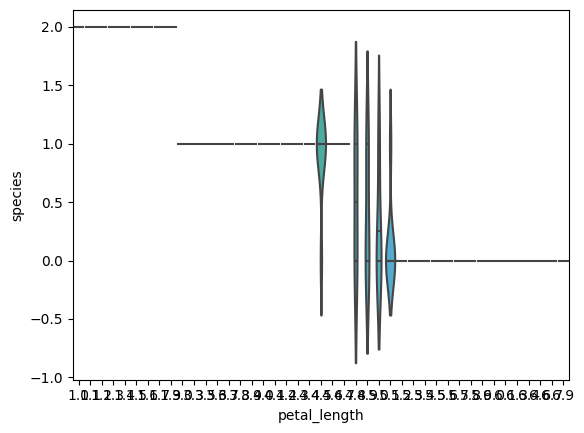

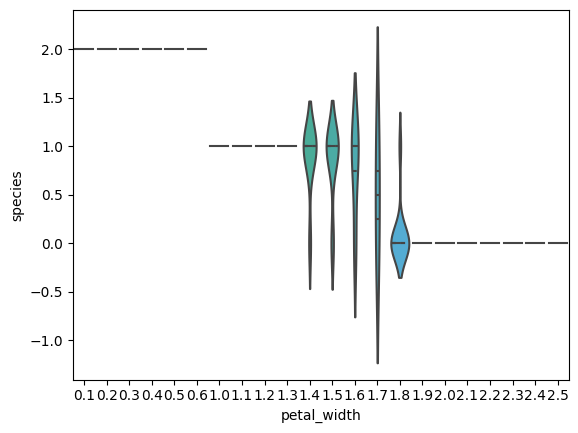

In [139]:
g = sns.violinplot(y='species', x='sepal_length', data=data, inner='quartile')
py.show()
g = sns.violinplot(y='species', x='sepal_width', data=data, inner='quartile')
py.show()
g = sns.violinplot(y='species', x='petal_length', data=data, inner='quartile')
py.show()
g = sns.violinplot(y='species', x='petal_width', data=data, inner='quartile')
py.show()


Training and Splitting DATA

Making the x and y coordinates

In [140]:
x=data.iloc[:,:4]
y=data.iloc[:,4]

In [141]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [142]:
y

0      2
1      2
2      2
3      2
4      2
      ..
145    0
146    0
147    0
148    0
149    0
Name: species, Length: 150, dtype: int64

We can see that x takes the features while y takes the species

Split the Data Into Train and Test Datasets
the training dataset is used to train the model and the test dataset is to test the model which has been trained with the training dataset

In [143]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=0)

Checking the dimensions of the split

In [144]:
x_train.shape

(105, 4)

In [145]:
x_test.shape

(45, 4)

In [146]:
y_train.shape

(105,)

In [147]:
y_test.shape

(45,)

LogisticRegression model

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,confusion_matrix,accuracy_score

In [149]:
model=LogisticRegression()

Now train the model prepared to fit the train value sets of x and y

In [150]:
model.fit(x_train,y_train)

LogisticRegression()

Predicting results

In [151]:
y_pred=model.predict(x_test)
y_pred

array([0, 1, 2, 0, 2, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 1,
       2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 2, 0, 0, 1, 2, 0, 1, 1, 0, 2, 0, 2,
       2])

Now get the confusion matrix 

In [152]:
confusion_matrix(y_test,y_pred)

array([[11,  0,  0],
       [ 1, 17,  0],
       [ 0,  0, 16]])

In [153]:
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of the model is {:.2f}".format(accuracy))

Accuracy of the model is 97.78
